In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

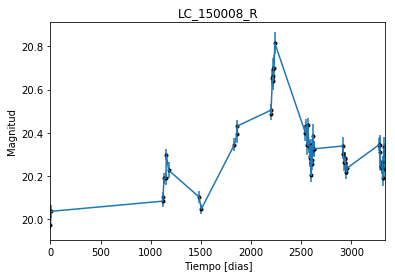

In [2]:
data = np.genfromtxt('LC_150008_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_150008_R')
plt.savefig("LC_150008_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

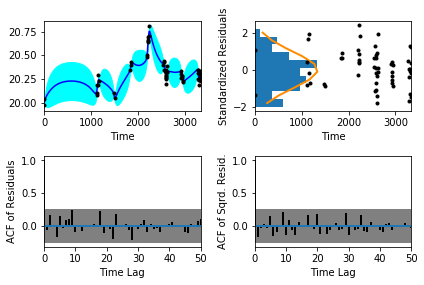

In [5]:
sample.assess_fit()

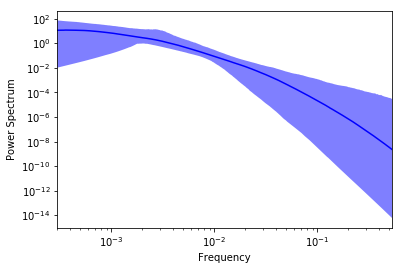

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

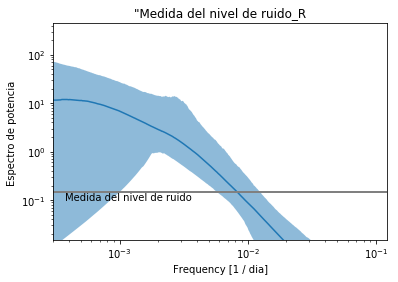

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_150008_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_150008_R')

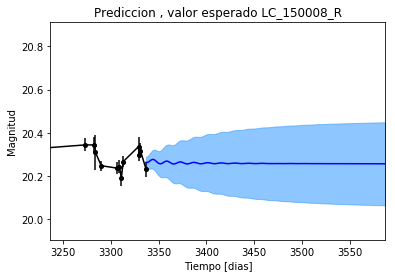

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_150008_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_150008_R')

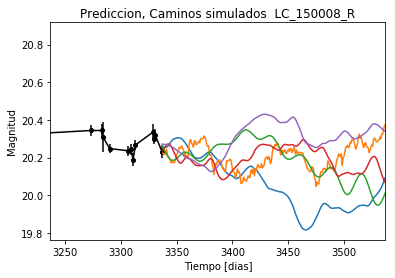

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_150008_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


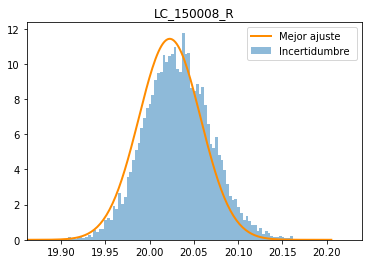

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_150008_R')
plt.savefig("Mejor_ajuste_LC_150008_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_150008_R')

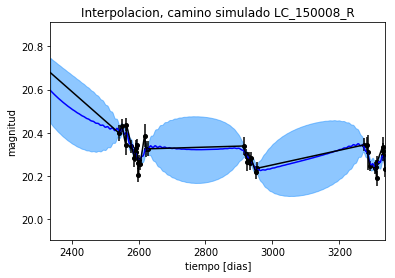

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_R')

Text(0.5,1,'Interpolacion, camino simulado LC_150008_R')

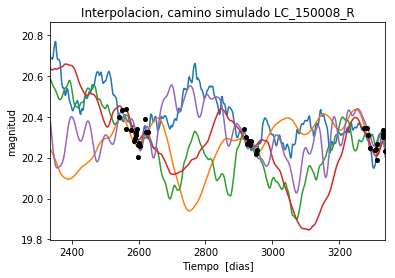

In [26]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_R')

In [27]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [28]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 564.542786377
Median: 0.0255726809582
Standard deviation: 0.219901300446
68% credibility interval: [ 0.00164514  0.2645103 ]
95% credibility interval: [  4.20913787e-04   8.71270731e-01]
99% credibility interval: [  3.31699315e-04   1.03313590e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 420.095854195
Median: 0.00334608143694
Standard deviation: 0.116978983563
68% credibility interval: [ 0.00049819  0.06692078]
95% credibility interval: [  3.29216684e-04   4.11076129e-01]
99% credibility interval: [  3.08309965e-04   8.26105446e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1243.77354156
Median: 0.0365592328017


In [29]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 708.706218978
Median: 102.201247441
Standard deviation: 1.72138012083
68% credibility interval: [ 100.20141427  103.45150586]
95% credibility interval: [  97.59298953  104.19679779]
99% credibility interval: [  95.57583574  104.51697763]


In [30]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 770.431801135
Median: 1.06123649786
Standard deviation: 2.4136630492
68% credibility interval: [ 0.16870348  4.47363365]
95% credibility interval: [ 0.03258034  7.99678275]
99% credibility interval: [  0.01610445  12.61644482]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 307.001015876
Median: 0.639179998971
Standard deviation: 10.7063573221
68% credibility interval: [  0.02722657  10.10923975]
95% credibility interval: [  3.92403039e

In [31]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 36629706228.5
Median: 0.00128645258971
Standard deviation: 4.62170730221e+99
68% credibility interval: [  1.61146912e-33   2.90805270e+42]
95% credibility interval: [  1.71708573e-63   3.04419848e+81]
99% credibility interval: [  4.67522554e-72   9.34179880e+90]


In [32]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1531.6991276
Median: 20.2812600302
Standard deviation: 0.0980133128108
68% credibility interval: [ 20.18606475  20.35103414]
95% credibility interval: [ 20.04915844  20.44621612]
99% credibility interval: [ 19.92709182  20.54538084]


In [33]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 620.107820021
Median: 0.00753926149351
Standard deviation: 0.252911536669
68% credibility interval: [ 0.          0.36395169]
95% credibility interval: [ 0.          0.92144372]
99% credibility interval: [ 0.          1.03949223]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 620.107820021
Median: 0.00753926149351
Standard deviation: 0.252911536669
68% credibility interval: [ 0.          0.36395169]
95% credibility interval: [ 0.          0.92144372]
99% credibility interval: [ 0.          1.03949223]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 286.11633791
Median: 0.0
Standard deviation: 0.000941882648121
68% c

In [34]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 708.706218978
Median: 102.201247441
Standard deviation: 1.72138012083
68% credibility interval: [ 100.20141427  103.45150586]
95% credibility interval: [  97.59298953  104.19679779]
99% credibility interval: [  95.57583574  104.51697763]


In [35]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1169.23921326
Median: 0.0468873175417
Standard deviation: 0.0447543036375
68% credibility interval: [ 0.0282581   0.08396148]
95% credibility interval: [ 0.01939491  0.16538195]
99% credibility interval: [ 0.01590504  0.29096517]


In [36]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1342.22634149
Median: 1.00754699266
Standard deviation: 0.174764463457
68% credibility interval: [ 0.85088902  1.19503092]
95% credibility interval: [ 0.72251994  1.4137691 ]
99% credibility interval: [ 0.64618962  1.54583619]


In [37]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 476.309315553
Median: 0.000131123843885
Standard deviation: 0.199589198156
68% credibility interval: [  1.52856787e-45   2.48793109e-02]
95% credibility interval: [  7.66645309e-85   2.63063658e-01]
99% credibility interval: [  2.66903293e-94   1.44261559e+00]


In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 564.542786377
Median: (-0.160677893262+0j)
Standard deviation: 2.10576554405
68% credibility interval: [-1.66196721+0.j -0.01033675+0.j]
95% credibility interval: [ -5.47435546e+00+0.j          -2.64467932e-03-0.06924169j]
99% credibility interval: [ -6.49138432e+00+0.j          -2.08412826e-03-0.02153267j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 420.095854195
Median: (-0.0210240497212+0j)
Standard deviation: 1.75083783318
68% credibility interval: [-0.42047563+0.64185258j -0.00313024+0.00190234j]
95% credibility interval: [ -2.58286750e+00+5.02717054j  -2.06852943e-03+0.j        ]
99% credibility interval: [ -5.19057360e+00+3.62032218j  -1.93716864e-03+0.j        ]
Posterior summary for parameter ar_roots  ele